# Clustering

## Clustering Models: Agglomerative

Agglomerative clustering is a type of hierarchical clustering that builds clusters from the bottom up. It works as follows:

- Initially, each data point is assigned to its own cluster.
- Then, the two clusters that are closest to each other are merged into one.
- This process is repeated until the desired number of clusters is reached or another stopping criterion is met.

The most common stopping criterion is the number of clusters, which can be specified by the user. Scikit-learn implements this option in its agglomerative clustering module.

### Linkage Criteria

Linkage criteria measure the similarity between two clusters and determine which ones to merge. There are four common options:

- **ward**: This is the default option. It merges the two clusters that cause the least increase in variance within all clusters. This results in clusters of similar size.
- **average**: This option calculates the average distance between all points in two clusters and merges the ones with the smallest value.
- **complete**: This option (also called maximum linkage) finds the maximum distance between any two points in two clusters and merges the ones with the smallest value.
- **single**: This option (also called minimum linkage) finds the minimum distance between any two points in two clusters and merges the ones with the smallest value.

Ward works well for most datasets, but the other options might be better if the clusters have unequal sizes. For example, if one cluster is much larger than the rest.

Some of the hyperparameters for AgglomerativeClustering from the sklearn:

- **n_clusters**: The number of clusters to find. It must be an integer or None (if `distance_threshold` is not None).

- **metric**: The metric used to compute the linkage. Can be "euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed". If the linkage is "ward", only "euclidean" is accepted.

- **memory**: Used to cache the output of the computation of the tree. It can be a path to the caching directory or an object with the joblib.Memory interface.

- **connectivity**: Defines the neighboring samples following a given structure of the data. It can be a connectivity matrix or a callable that transforms the data into a connectivity matrix.

- **compute_full_tree**: Whether to stop early the construction of the tree at `n_clusters` or not. It's useful to decrease computation time and must be True if `distance_threshold` is not None.

- **linkage**: The linkage criterion to use, which determines the distance between sets of observations. Options are "ward", "complete", "average", or "single".

- **distance_threshold**: The linkage distance threshold above which clusters will not be merged. If not None, `n_clusters` must be None, and `compute_full_tree` must be True].

- **compute_distances**: Whether to compute distances between clusters for dendrogram visualization, even if `distance_threshold` is not used.

### Implementation Notes

- Agglomerative clustering does not have a predict method.
- You need to use the fit_predict method to assign cluster labels to new data.
- You can visualize the cluster hierarchy with a dendrogram and choose the optimal number of clusters.

<font color='Blue'><b>Example:</b></font>

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Use a custom style from a specified URL
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENSF444/main/Files/mystyle.mplstyle')

# Generate synthetic two-dimensional data
X, y = make_blobs(random_state = 2)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
display(df)

# Create subplots for original data and clustered data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(df['Feature 1'], df['Feature 2'],
           c='gray', edgecolor='k', linewidth=1, alpha=0.7, s=40, zorder = 2)
ax.set(xlabel='Feature 1', ylabel='Feature 2',
        xlim = [-6, 8], ylim = [-12, 2], aspect = 'equal')
ax.grid(True)
# Adjust layout for better presentation
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
import seaborn as sns

n_clusters = 3
# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                      linkage='ward')
clustering.fit(df)

# Define a custom color map for the clusters
colors = ["#f44336", "#4e9130", "#2986cc"]
cmap = ListedColormap(colors)

# Create subplots for original data and clustered data
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Scatter plot for the original data
axs[0].scatter(df['Feature 1'], df['Feature 2'], c='gray', edgecolor='k',
                linewidth=1, alpha=0.7, s=40, zorder = 2)
axs[0].set_title('Original Data', fontsize=14)

# Scatter plot for the clustered data
sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = axs[1],
                hue=clustering.labels_, palette=colors,
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
axs[1].legend(loc='best', title = 'Cluster')

axs[1].set_title(f'AgglomerativeClustering\n(n_clusters = {n_clusters}, linkage = ward)', fontsize=14)

axs[1].text(0.52, 0.04, f'Silhouette = {silhouette_score(df, clustering.labels_):.3f}',
            transform=axs[1].transAxes, fontsize=12, weight='bold',
            bbox=dict(facecolor='Whitesmoke', alpha=0.7))

# Set labels for axes
for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2',
            xlim = [-5, 7.5], ylim = [-12, 2], aspect = 'equal')
    ax.grid(True)

# Adjust layout for better presentation
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

def visualize_agglomerative_clustering(df_inp, n_clusters, linkages=['ward', 'complete', 'average', 'single']):
    """
    Visualizes Agglomerative Clustering results with different linkages on a 2x2 subplot.

    Parameters:
    - df_inp: DataFrame, input data with features.
    - n_clusters: int, number of clusters for Agglomerative Clustering.
    - linkages: list of str, linkage criteria for Agglomerative Clustering.
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Define a custom color map for the clusters
    colors = ["#f44336", "#4e9130", "#2986cc"]
    cmap = ListedColormap(colors)

    for i, linkage in enumerate(linkages):
        # Perform Agglomerative Clustering
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        clustering.fit(df_inp)

        # Scatter plot for the clustered data
        sns.scatterplot(x = df_inp['Feature 1'],
                        y = df_inp['Feature 2'],
                        ax = axs[i],
                        hue=clustering.labels_, palette=colors,
                        edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
        axs[i].legend(loc='best', title = 'Cluster')
        axs[i].set_title(f'Linkage = {linkage}', fontsize=14)
        axs[i].set(xlabel='Feature 1', ylabel='Feature 2',
                   xlim = [-5, 7.5], ylim = [-12, 2], aspect = 'equal')
        axs[i].text(0.48, 0.04,
                    f'Silhouette = {silhouette_score(df, clustering.labels_):.3f}',
                    transform=axs[i].transAxes, fontsize=12, weight='bold',
                    bbox=dict(facecolor='Whitesmoke', alpha=0.7))

    # Adjust layout for better presentation
    plt.tight_layout()

# Example usage:
visualize_agglomerative_clustering(df, n_clusters=3)

## Dendrogram to visualize cluster formation

A dendrogram is a tree-like diagram that shows how data points are grouped into clusters based on their similarity or distance. For example, suppose we have a synthetic two-dimensional data set with 15 points, as shown in the left plot below. We can apply agglomerative clustering, which is a bottom-up approach that starts with each point as a single cluster and then merges the closest clusters until a desired number of clusters is reached. The ward linkage method is one way to measure the distance between clusters, which minimizes the variance within each cluster and tends to produce compact and spherical clusters. The right plot below shows the result of agglomerative clustering with three clusters, indicated by different colors. We can also use the silhouette score to evaluate how well each point fits its cluster, which ranges from -1 to 1. A higher silhouette score means a better clustering. The silhouette score for this example is 0.659, which is relatively high.

The dendrogram can help to visualize the hierarchical structure of the data and to determine the optimal number of clusters. The dendrogram below shows how the clusters are formed and the distance between them. Each node represents a cluster, and the height of the node indicates the distance between the clusters that are merged. The lower the node, the more similar the clusters are. We can also use horizontal lines to cut the dendrogram at different levels and obtain different numbers of clusters. For example, if we cut the dendrogram at the dashed line near the top, we get two clusters. If we cut the dendrogram at the dashed line near the bottom, we get three clusters. We can also add annotations to indicate the number of clusters at each level.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.cluster import hierarchy

# Generate synthetic two-dimensional data
X, y = make_blobs(random_state=0, n_samples=15)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
display(df)

n_clusters = 3

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(df)

# Define a custom color map for the clusters
colors = ["#FF7C4C", "#4e9130", "#c90076"]

# Create subplots for original data and clustered data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for the original data
axs[0].scatter(df['Feature 1'], df['Feature 2'], c='gray', edgecolor='k', linewidth=1, alpha=0.7, s=40, zorder=2)
axs[0].set_title('Original Data', fontsize=14)

# Scatter plot for the clustered data
sns.scatterplot(x=df['Feature 1'], y=df['Feature 2'], ax=axs[1], hue=clustering.labels_, palette=colors,
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
axs[1].set_title(f'Agglomerative Clustering\n(n_clusters = {n_clusters}, linkage = ward)', fontsize=14)

axs[1].text(0.53, 0.04, f'Silhouette = {silhouette_score(df, clustering.labels_):.3f}',
            transform=axs[1].transAxes, fontsize=12, weight='bold', bbox=dict(facecolor='Whitesmoke', alpha=0.7))
axs[1].legend(loc='best', title = 'Cluster')

# Set labels for axes
for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2', xlim=[-4, 4], ylim=[-1, 7], aspect='equal')
    ax.grid(True)

# Adjust layout for better presentation
plt.tight_layout()

# Dendrogram plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.grid(False)
z = hierarchy.complete(df)
hierarchy.set_link_color_palette(colors)
_ = hierarchy.dendrogram(z, ax=ax, count_sort=True, distance_sort=True)

# Plot horizontal lines with cluster annotations
bounds = ax.get_xbound()
for hline, annotation in zip([6.5, 4], [' Two Clusters', ' Three Clusters']):
    ax.plot(bounds, [hline] * 2, '--', lw=2, c='k')
    ax.text(bounds[1], hline, annotation, va='center', fontdict={'size': 15})

ax.set(xlabel="Sample index", ylabel="Cluster Distance")

# Adjust layout for better presentation
plt.tight_layout()

## Clustering Models: DBSCAN

DBSCAN is a clustering algorithm that stands for **D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise. It has the following advantages:

- It does not require specifying the number of clusters in advance
- It can discover clusters with arbitrary shapes
- It can detect outliers or noise points that do not belong to any cluster

DBSCAN is based on the concept of density in the feature space, which measures how close data points are to each other. DBSCAN identifies clusters as regions of high density, separated by regions of low density. DBSCAN is slower than agglomerative and k-means algorithms, but it can handle larger datasets and more complex data structures.

### DBSCAN Hyperparameters

**DBSCAN** is a clustering algorithm that groups data points based on their **density**. It requires the user to specify two hyperparameters that control the density of a region:

- **min_samples**: This is the minimum number of data points that must be within a certain distance to form a dense region. A data point is considered a **core sample** (or core point) if it has at least min_samples neighbors, including itself, within a given radius.
- **eps**: This is the radius that defines the distance between data points. Two data points are considered neighbors if they are within eps distance of each other. DBSCAN assigns the same cluster label to core samples that are neighbors, and to any other data point that is reachable from a core sample by a chain of neighbors.

DBSCAN identifies core samples as data points that belong to a dense region, and clusters them based on their proximity. The choice of min_samples and eps can affect the number and size of the clusters that DBSCAN finds.

<center>
<img src="https://cdn-images-1.medium.com/v2/resize:fit:1600/1*tc8UF-h0nQqUfLC8-0uInQ.gif" alt="picture" width="700">
<br>
<b>Figure</b>: An example of using DBSCAN. Image source: https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/
</center>



### DBSCAN Methodology

1. It randomly selects a data point that has not been visited yet.
1. It checks how many data points are within a distance of `eps` from the selected point. This is called the **neighborhood** of the point.
1. If the neighborhood has fewer than `min_samples` data points, the selected point is marked as **noise**, meaning it does not belong to any cluster.
1. If the neighborhood has at least `min_samples` data points, the selected point is marked as a **core points** and assigned a new cluster label. Then, the algorithm visits all the data points in the neighborhood and assigns them the same cluster label. If any of these data points are also core points, their neighborhoods are visited and labeled as well, and so on. This process continues until all the data points that are reachable from the selected point by a chain of neighbors are clustered.
1. The algorithm repeats the above steps until all the data points have been visited and labeled.

### Types of Points

DBSCAN distinguishes between three types of data points based on their density and distance:

- **Core points** are data points that have at least `min_samples` data points within a distance of `eps` from them. They are the main drivers of the clustering process.

- **Boundary points** are data points that are within a distance of `eps` from a core point, but have fewer than `min_samples` data points in their neighborhood. They are assigned to the same cluster as the nearest core point, but they do not expand the cluster.

- **Noise points** are data points that are neither core nor boundary points. They are considered outliers and do not belong to any cluster.

The clustering of the core points is **deterministic**, meaning that it does not depend on the order of the data points or the random selection of the starting point. The same core points will always be clustered together, and the same points will always be labeled as noise, regardless of how many times the DBSCAN algorithm is run on the same dataset.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic two-dimensional data
X, _ = make_blobs(n_samples= 100, n_features=2,
                  centers = 4,
                  cluster_std= [0.8, 0.5, 0.8, 0.6],
                  random_state=0)

df = pd.DataFrame(X[:, ::-1], columns=['Feature 1', 'Feature 2'])
display(df)

fig, axs = plt.subplots(2, 2, figsize=(10, 9))
axs = axs.flatten()

sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = axs[0],
                color = 'gray',
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
axs[0].set_title('Original Data', fontsize=14)

for i, min_samples in enumerate([3, 4, 5], 1):
    clustering = DBSCAN(eps = 0.5, min_samples = min_samples)
    clustering.fit(df)
    sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = axs[i],
                    hue=clustering.labels_, palette= 'Set1',
                    edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
    axs[i].legend(loc='best', title = 'Cluster')
    axs[i].set_title(f'min_samples = {min_samples}', fontsize=14)
    axs[i].text(0.52, 0.04,
                f'Silhouette = {silhouette_score(df, clustering.labels_):.3f}',
                transform=axs[i].transAxes, fontsize=12, weight='bold',
                bbox=dict(facecolor='Whitesmoke', alpha=0.7))

for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2',
           ylim = [-5, 5], xlim = [-1, 10],
           aspect = 'equal')
# Adjust layout for better presentation
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

fig, axs = plt.subplots(2, 2, figsize=(10, 9))
axs = axs.flatten()

sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = axs[0],
                color = 'gray',
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
axs[0].set_title('Original Data', fontsize=14)

for i, eps in enumerate([0.3, 0.7, 1], 1):
    clustering = DBSCAN(eps = eps, min_samples = 5)
    clustering.fit(df)

    sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = axs[i],
                    hue=clustering.labels_, palette= 'Set1',
                    edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
    axs[i].legend(loc='best', title = 'Cluster')
    axs[i].set_title(f'eps = {eps:.1f}', fontsize=14)
    axs[i].text(0.52, 0.04,
                f'Silhouette = {silhouette_score(df, clustering.labels_):.3f}',
                transform=axs[i].transAxes, fontsize=12, weight='bold',
                bbox=dict(facecolor='Whitesmoke', alpha=0.7))

for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2',
           ylim = [-5, 5], xlim = [-1, 10],
           aspect = 'equal')
# Adjust layout for better presentation
plt.tight_layout()

## Clustering Models: Gaussian Mixture Models (GMM)

**K-means clustering** is a popular method due to its simplicity and efficiency.


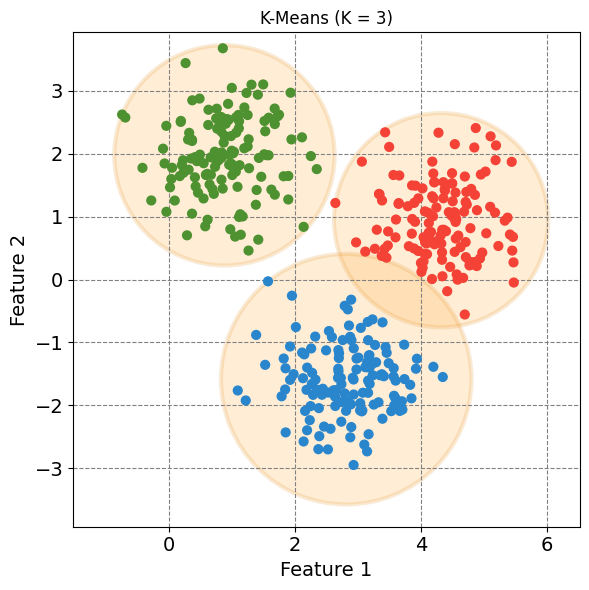

In [375]:
#@title K-Means Example

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap

# Use a custom style from a specified URL
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENSF444/main/Files/mystyle.mplstyle')

# Generate data
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # Flip axes for better plotting

# Initialize KMeans model
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)

# Fit the model and predict labels
labels = kmeans.fit(X).predict(X)

# Set colors for clusters
colors = ["#f44336", "#4e9130", "#2986cc"]
cmap = ListedColormap(colors)

# Function to plot KMeans clusters
def plot_kmeans(kmeans, X, n_clusters=3, ax=None, cmap=cmap):
    '''
    Original code was available from
    https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    '''
    labels = kmeans.fit_predict(X)

    # Plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=cmap, zorder=2)

    # Plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]

    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#ffa733', edgecolor='#e5962d', lw=3, alpha=0.2, zorder=1))

# Initialize KMeans model with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

# Plot KMeans clusters
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_kmeans(kmeans, X, ax = ax)
ax.set(xlabel='Feature 1', ylabel='Feature 2', title = 'K-Means (K = 3)',
        xlim = [-2, 7], ylim = [-4, 4], aspect = 'equal')
plt.tight_layout()

 However, it struggles with complex cluster shapes and structures because it assigns points to the nearest cluster center, leading to spherical clusters of equal size. This limitation becomes apparent with data that exhibit elongated, overlapping, or nested clusters.

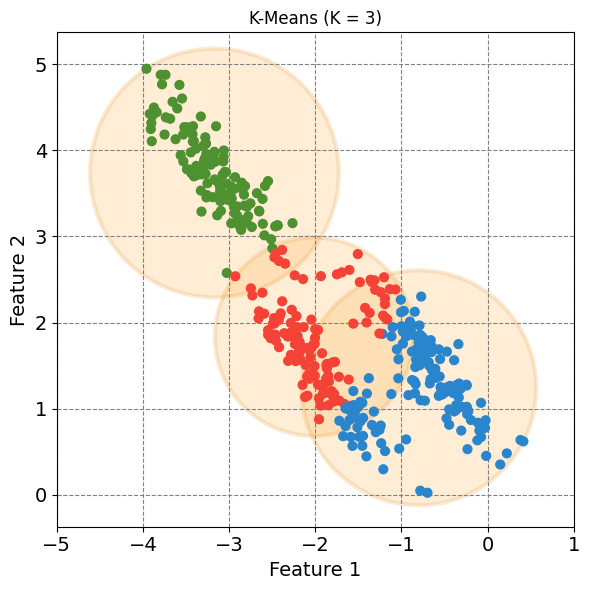

In [376]:
#@title K-Means Example (elongated)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
kmeans = KMeans(n_clusters=3, random_state=0, n_init = 10)
# Plot KMeans clusters
plot_kmeans(kmeans, X_stretched, ax = ax)
ax.set(xlabel='Feature 1', ylabel='Feature 2', title = 'K-Means (K = 3)',
        xlim = [-5, 1], ylim = [-1, 6],
       aspect = 'equal')
plt.tight_layout()

In contrast, **Gaussian Mixture Models (GMMs)** offer a more sophisticated approach. They are adept at modeling clusters with diverse shapes, sizes, and orientations, making them a superior alternative to K-means for complex datasets.

### How GMM Works:

- GMMs posit that data points are generated from a combination of multiple Gaussian distributions, each characterized by its mean, covariance, and mixture weight.

- The objective of GMMs is to infer these parameters and categorize each data point into the Gaussian distribution it most likely belongs to.

- Additionally, GMMs can quantify the uncertainty of cluster assignments by calculating the posterior probability for each Gaussian component given the data. This feature is particularly useful for pinpointing ambiguous data points or outliers.





### Understanding GMM Cluster Shapes:

In Gaussian Mixture Models (GMMs), the shape of each cluster is determined by its covariance matrix, which captures the spread and directionality of data points. Scikit-learn's `covariance_type` parameter offers four options, each affecting cluster geometry differently:

- **`"spherical"`**: This option assumes that clusters are spherical, with equal variance in all directions—similar to the clusters formed by K-means. However, unlike K-means, GMMs with spherical covariance can have clusters of different sizes due to varying component weights.

- **`"diag"`**: Here, clusters can stretch along the feature axes since each feature has its own variance, but features are considered uncorrelated. This results in elongated, axis-aligned clusters.

- **`"tied"`**: With a tied covariance matrix, all clusters share the same shape and orientation but can differ in size and position. This leads to elliptical clusters that have the same orientation across the feature space.

- **`"full"`**: The most flexible option, where each cluster has its own covariance matrix, allowing for elliptical clusters of any orientation and shape. This flexibility comes at the cost of increased computational complexity due to the larger number of parameters to estimate.

Each `covariance_type` influences the flexibility and constraints of cluster shapes, with implications for model complexity and the nature of the data being modeled.

In [ ]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

# Set colors for clusters
colors = ["#f44336", "#4e9130", "#2986cc"]
cmap = ListedColormap(colors)

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse with angle as a keyword parameter
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle,
                             fc='#999999', zorder=1,
                             **kwargs))
def plot_gmm(gmm, X, label=True, ax=None, cmap=cmap):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    # Scatter plot with or without labels
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)

    ax.axis('equal')

    # Set the factor for ellipse alpha
    w_factor = 0.2 / gmm.weights_.max()

    # Plot ellipses for each Gaussian component
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


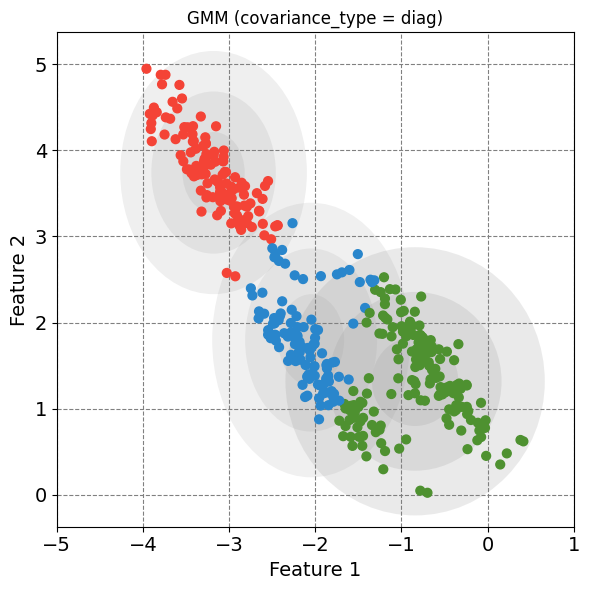

In [377]:
#@title GMM (Diag)
cov_type = 'diag'
gmm = GaussianMixture(n_components=3, covariance_type = cov_type, random_state=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_gmm(gmm, X_stretched, ax = ax)
ax.set(xlabel='Feature 1', ylabel='Feature 2', title = f'GMM (covariance_type = {cov_type})',
        xlim = [-5, 1], ylim = [-1, 6],
       aspect = 'equal')
plt.tight_layout()

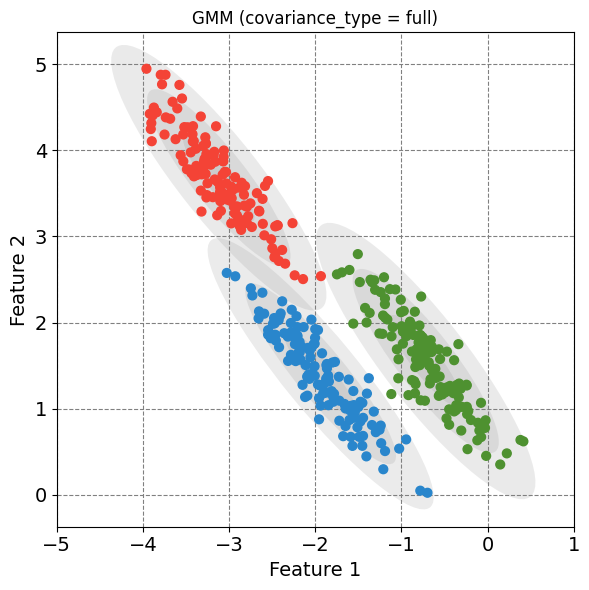

In [378]:
#@title GMM (full)
cov_type = 'full'
gmm = GaussianMixture(n_components=3, covariance_type = cov_type, random_state=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_gmm(gmm, X_stretched, ax = ax)
ax.set(xlabel='Feature 1', ylabel='Feature 2', title = f'GMM (covariance_type = {cov_type})',
        xlim = [-5, 1], ylim = [-1, 6],
       aspect = 'equal')
plt.tight_layout()